In [1]:
import tensorflow as tf
from keras import datasets ,layers , models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

Here I have imported the required libraries and their necessary classes and functions<br>
I used tensorflow and keras <br>
I used 2-3 youtube videos whose links are mentioned below<br>
I also used a Github repo and its link is also cited <br>
video_1_url=(https://www.youtube.com/watch?v=7HPwo4wnJeA&list=PLXEFB4p186sFJeMjYbwojWHGTc7gHxHg4)
video_2_url=(https://www.youtube.com/watch?v=JcU72smpLJk&t=97s)
github_repo_url=(https://github.com/keras-team/keras-contrib/blob/master/examples/cifar10_resnet.py)

In [2]:
(x_train , y_train) , (x_test , y_test) = datasets.cifar100.load_data()
x_train.shape

169001437/169001437 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

Here i have loaded the dataset CIFER and checked its number of images and size of each image

In [3]:
x_test.shape

(10000, 32, 32, 3)

I was checking the no of images in test sample and its size

In [4]:
#y_train = y_train.reshape(-1,)
print(y_train.shape)
y_train[:5]


(50000, 1)


array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

Here i got to know that what is the shape of y_train and what values does it store

In [5]:
# number of classes
nb_classes = len(np.unique(y_train))
print(nb_classes)
classes = ["apples","aquarium fish","baby","beaver","bear","bee", "beetle","bed","bicycle","bottles", "bowls","boy","bridge","bus","butterfly","camel","cans","castle","caterpillar","cattle","chair","chimpanzee","clock","cloud","cockroach","computer keyboard","couch", "crab","crocodile","cups","dinosaur", "dolphin","elephant","flatfish", "forest","fox","girl","hamster","house","kangroo","lamp","lawn mower","leopard", "lion","lizard","lobster","man","maple","motorcycle","mountain","mouse","mushrooms","oak","oranges","orchids" ,"otter","palm","pears","pickup truck","pine","plain","plates","poppies","porcupine","possum","rabbit","raccoon","ray","road","rockey","roses","sea","seal","shark","shrew","skunk","skyscraper", "snail","snake","spider","squirrel","streetcar","sunflowers","sweet peppers","table","tank","telephone", "television","tiger","tractor","train","trout" ,"tulips","turtle","wardrobe","whale","willow","wolf","woman","worm"]
print(len(classes))

100
100


Here I arranged the name of all the classes in dictionary order <br>
earlier I was planning to make a function to plot image using x_label as the name of image but uas unable to do it

In [6]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

### convert class vectors to binary class matrices ###
before conversion

    |  y_train   |            |  y_test    |
    |   Sample 1 |     0      |   Sample 1 |     1     |
    |   Sample 2 |     1      |   Sample 2 |     2     |
    |   Sample 3 |     2      |   Sample 3 |     1     |
    |   Sample 4 |     0      |   Sample 4 |     0     |
    |   Sample 5 |     2      |   Sample 5 |     1     |

after conversion

                 |  y_train  |            |  y_test  |
              | Cat | Dog | Bird |   | Cat | Dog | Bird |
    Sample 1  |  1  |  0   |  0  |   |  0  |  1  |  0   |
    Sample 2  |  0  |  1   |  0  |   |  0  |  0  |  1   |
    Sample 3  |  0  |  0   |  1  |   |  0  |  1  |  0   |
    Sample 4  |  1  |  0   |  0  |   |  1  |  0  |  0   |
    Sample 5  |  0  |  0   |  1  |   |  0  |  1  |  0   |

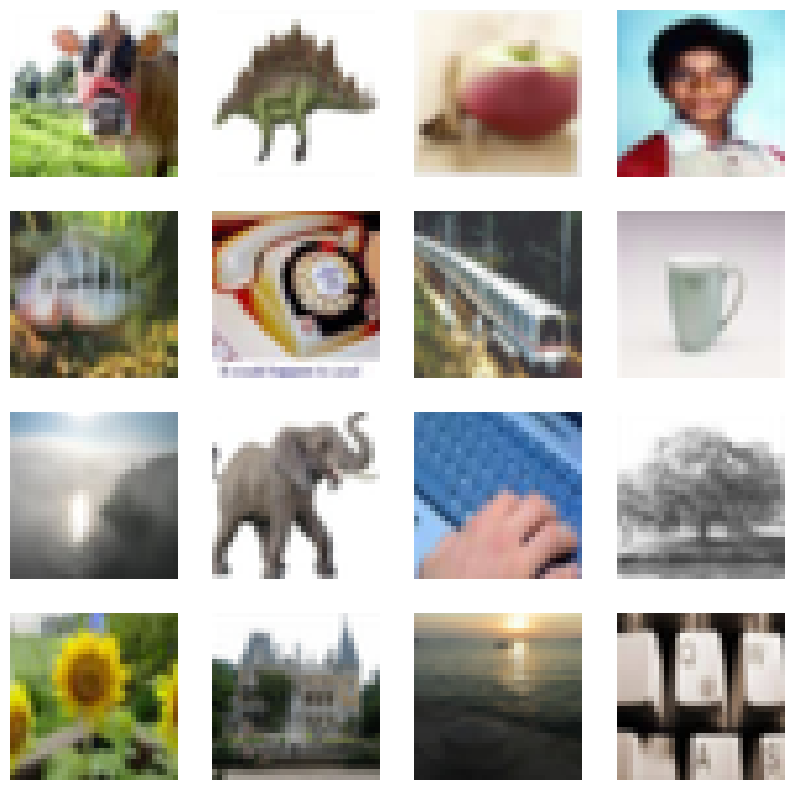

In [7]:
plt.figure(figsize=(10, 10))

for i in range (4*4):
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')

plt.show()


this is created to visualise the sample<br>
also to check that we are using the write sample or not<br>

In [8]:
x_train = x_train/255
x_test = x_test/255

It is done to normalise the dataset and it is divided by 255 as rgb has value from 0-255 for each color

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.applications import ResNet50V2
from keras.applications import VGG16



cnn = Sequential()

# Load pre-trained model
# pre_model = tf.keras.applications.ResNet50(include_top=False,
#                                            weights='imagenet',
#                                            input_shape=(32,32,3),
#                                            pooling='avg',
#                                            classes=10)
# pre_model = tf.keras.applications.ResNet50V2(include_top=False,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=(32,32,3),
#     pooling='avg',
#     classes=100,
#     classifier_activation="softmax",
# )
# pre_model = tf.keras.applications.VGG16(
#     include_top=False,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=(32,32,3),
#     pooling='avg',
#     classes=10
# )

# # Freeze layers in the pre-trained model
# for layer in pre_model.layers:
#     layer.trainable = False

# Add layers to your model
# cnn.add(pre_model)
# I tried adding different models but accuracy was coming very low
#I used 128 filters and not 32 or 64 filters because there are 100 classes. 32 filters and 64 filters were giving bad results.
#all the things i tried are experimental and using cifar10 class gives much better accuracy
cnn.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
cnn.add(Activation('elu'))

cnn.add(Conv2D(128, (3, 3)))
cnn.add(Activation('elu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(256, (3, 3), padding='same'))
cnn.add(Activation('elu'))

cnn.add(Conv2D(256, (3, 3)))
cnn.add(Activation('elu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(512, (3, 3), padding='same'))
cnn.add(Activation('elu'))

cnn.add(Conv2D(512, (3, 3)))
cnn.add(Activation('elu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(1024, activation='elu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(100, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 activation (Activation)     (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 128)       147584    
                                                                 
 activation_1 (Activation)   (None, 30, 30, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 128)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 256)       295168    
                                                        

I tried adding different models but accuracy was coming very low
I used 128 filters and not 32 or 64 filters because there are 100 classes. 32 filters and 64 filters were giving bad results.
all the things i tried are experimental and using cifar10 class gives much better accuracy
I tested by added Conv2D layers one by one and my accuracy increased.

In [10]:
from  keras.optimizers.legacy import Adam
cnn.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate = 0.0001, decay = 1e-6), metrics=['accuracy'])

I am using legacy optimizer Adam as new optimizer of Adam doesn't contain decay

In [11]:
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images

datagen.fit(x_train)


This is the part of the code that is copied from github repo and it helped to increased accuracy

In [12]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights = True)

# Fit data to model
training = cnn.fit(datagen.flow(x_train, y_train, batch_size=50),
                   steps_per_epoch=x_train.shape[0] // 50,
                   epochs=500,
                   validation_data=(x_test, y_test),
                   verbose=1,
                   callbacks=[early_stop])

Epoch 1/500
1000/1000 [==============================] - 52s 45ms/step - loss: 3.9410 - accuracy: 0.1030 - val_loss: 3.4107 - val_accuracy: 0.2000
Epoch 2/500
1000/1000 [==============================] - 40s 40ms/step - loss: 3.3412 - accuracy: 0.2015 - val_loss: 2.8835 - val_accuracy: 0.3025
Epoch 3/500
1000/1000 [==============================] - 40s 40ms/step - loss: 3.0251 - accuracy: 0.2629 - val_loss: 2.6619 - val_accuracy: 0.3398
Epoch 4/500
1000/1000 [==============================] - 40s 40ms/step - loss: 2.8360 - accuracy: 0.2990 - val_loss: 2.4988 - val_accuracy: 0.3696
Epoch 5/500
1000/1000 [==============================] - 41s 41ms/step - loss: 2.6982 - accuracy: 0.3271 - val_loss: 2.3963 - val_accuracy: 0.3981
Epoch 6/500
1000/1000 [==============================] - 42s 42ms/step - loss: 2.5815 - accuracy: 0.3496 - val_loss: 2.2954 - val_accuracy: 0.4157
Epoch 7/500
1000/1000 [==============================] - 40s 40ms/step - loss: 2.4868 - accuracy: 0.3705 - val_loss: 2

Early stopping function is used so that whenever the validataion is lowest for next 8 values the epoch will stop and the model trainning will be complete<br>
I used batch size 50 as it was giving a better accuracy<br>

In [13]:
evaluation = cnn.evaluate(datagen.flow(x_test, y_test, batch_size=50),
                                      steps=x_test.shape[0] // 50)

print('Model Accuracy = %.3f' % (evaluation[1]))

200/200 [==============================] - 6s 28ms/step - loss: 1.4227 - accuracy: 0.6398
Model Accuracy = 0.640


This is the part where I tested the accuracy of the model and the accuracy turns out to be 64 % which is pretty good

Test loss: 1.3125311136245728 / Test accuracy: 0.6581000089645386


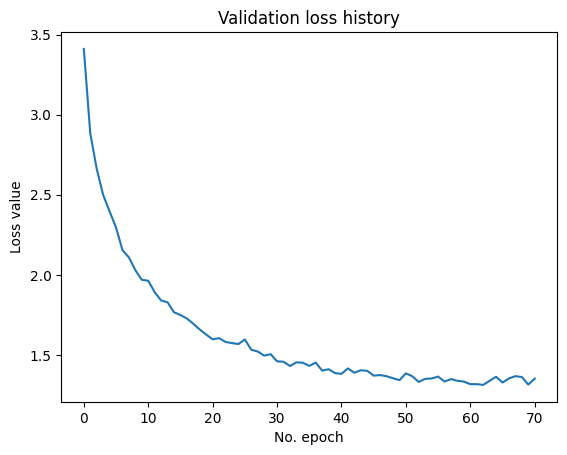

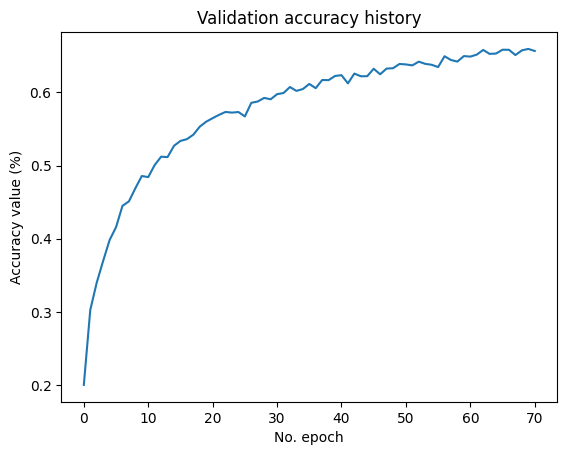

In [14]:
# Generate generalization metrics
score = cnn.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(training.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(training.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

These are the plots for validataion loss history vs no. of epoch and validataion accuracy history vs no. of epoch 

### Model Discussion: ###
This model is working well with a very high accuracy of 64+ % which is decent<br>
In this model I prepared a model with many layers whcih in my case helped me alot to incerease my accuracy to such a great extent with addition of some layers<br>
### Difficulties faced: ###
* In choosing the dataset. I tried working on COCO and Pascal VOC dataset but I couldn't make it and this costed me around 4 5 days.Then while checking on YT I got a video and using this CIFAR100 dataset which is preincluded in keras library I completed this question.<br>
* Increasing accuracy of the model, it was a very difficult task to increase to increase the accuracy of this model.<br>
* Waiting for model to get trained took a lot of time.
### Modifications: ###
* By increasing the patiatence accuracy can be further increased.<br>
* By adding mutiple layers accuracy can be increased.<br>
* By using a pretrained model which has better accuracy than VGG16.<br>
* By using a better dataset which much more images than this.<br>
